In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data
from utils.visualization import scatter_data, scatter3d_data, visualization_2d, visualization_3d
from utils.preprocessing import scale_data, standardize_data, normalize_data

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test

In [5]:
choose_folder = nbaiot_data_path
# print(choose_folder)

In [6]:
train_index = 6

In [7]:
# Load data on device 
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [8]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((98514, 115), (98514,)),
 ((309040, 115), (309040,)),
 ((429337, 115), (429337,)))

In [9]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [10]:
data_benign = data_benign.to_numpy()

In [11]:
target_benign = target_benign.to_numpy()

In [12]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt), type(data_mirai), type(target_mirai)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

# Visualization 2D

### Before Standardization

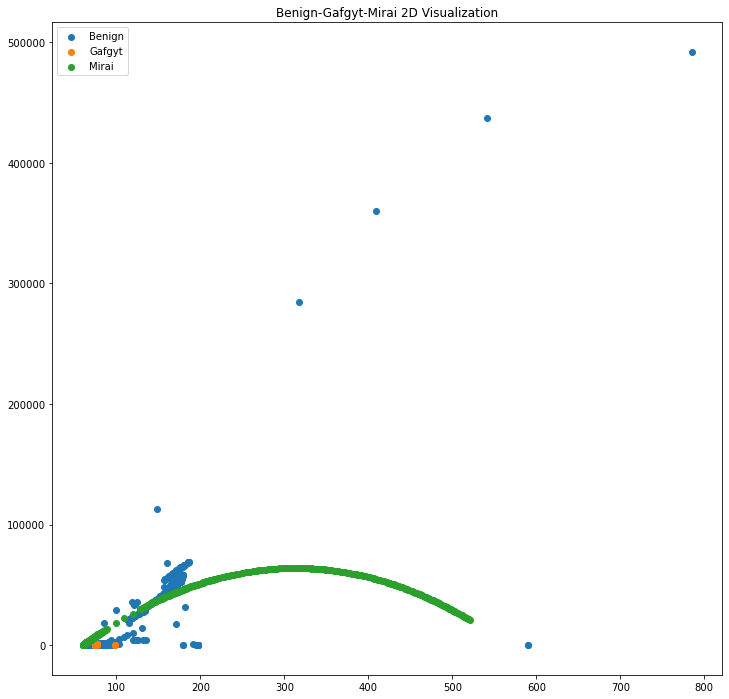

In [13]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2])

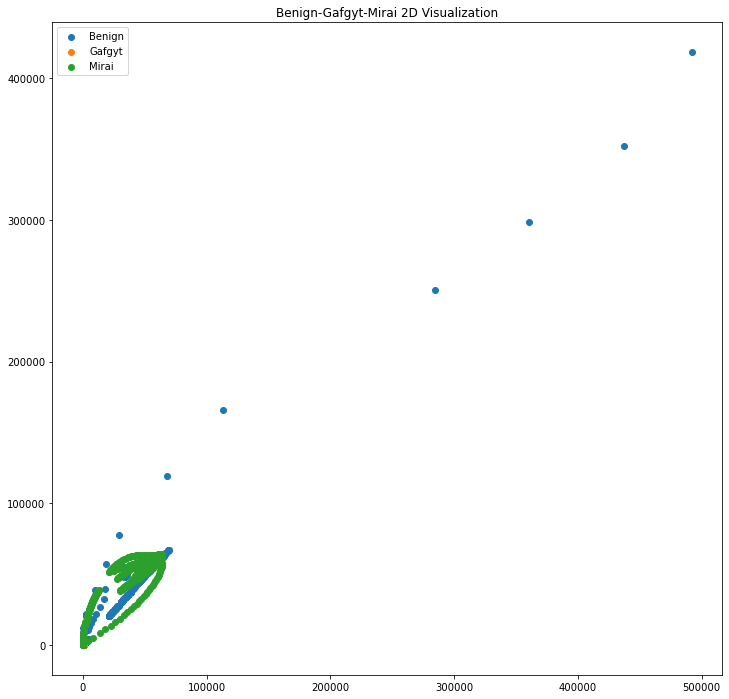

In [14]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[2,5])

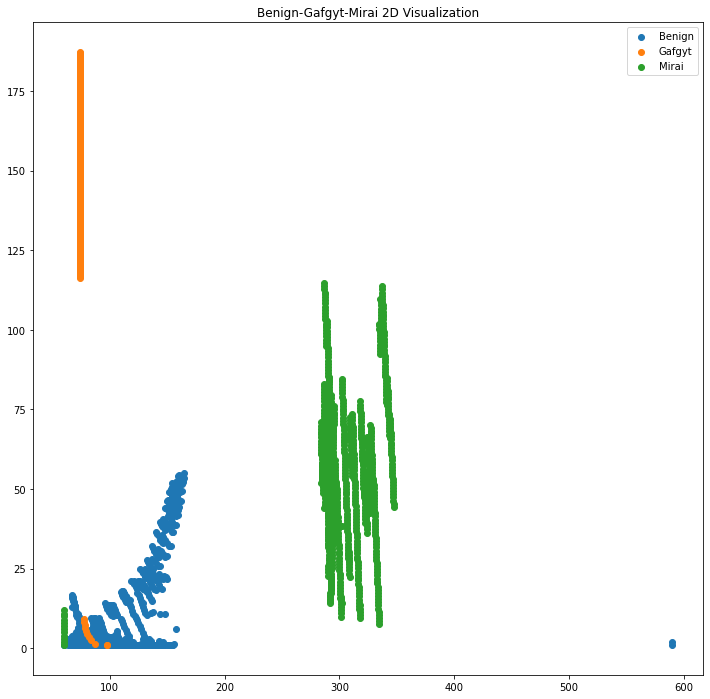

In [15]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[10,15])

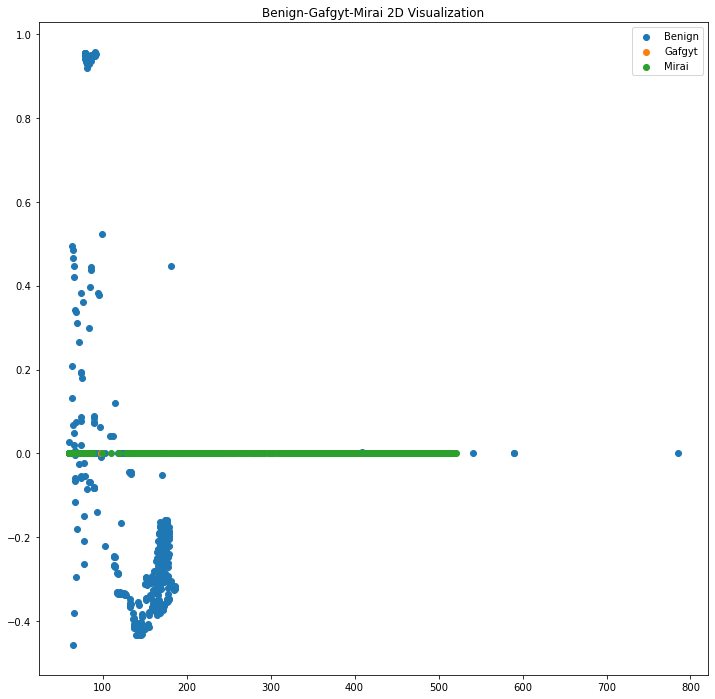

In [16]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,50])

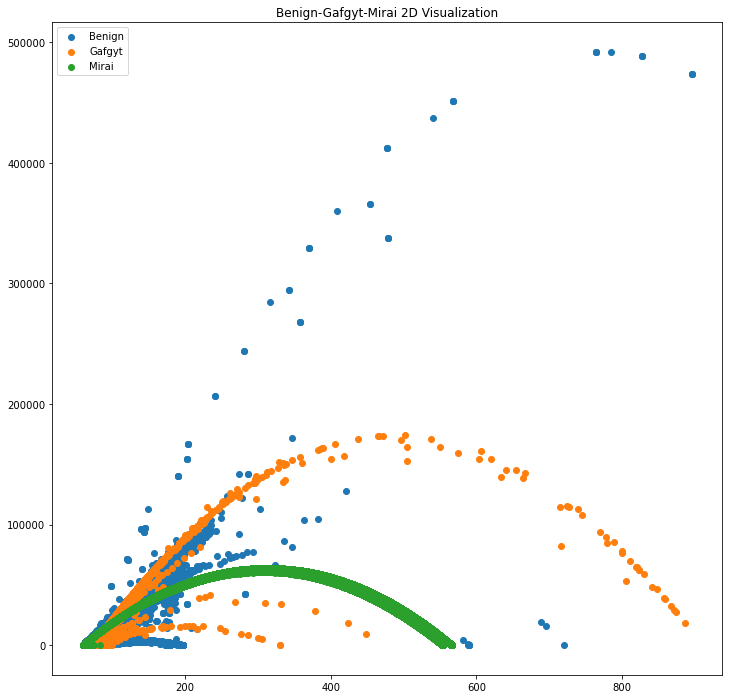

In [17]:
visualization_2d(data_benign, data_gafgyt, data_mirai, indexes=[1,2])

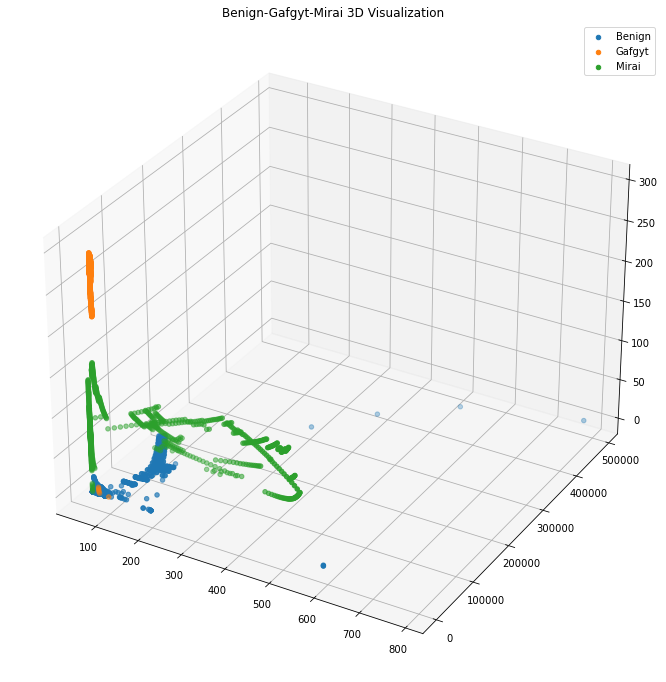

In [18]:
visualization_3d(data_benign[:1000], data_gafgyt[:1000],data_mirai[:1000], indexes=[1,2,3])

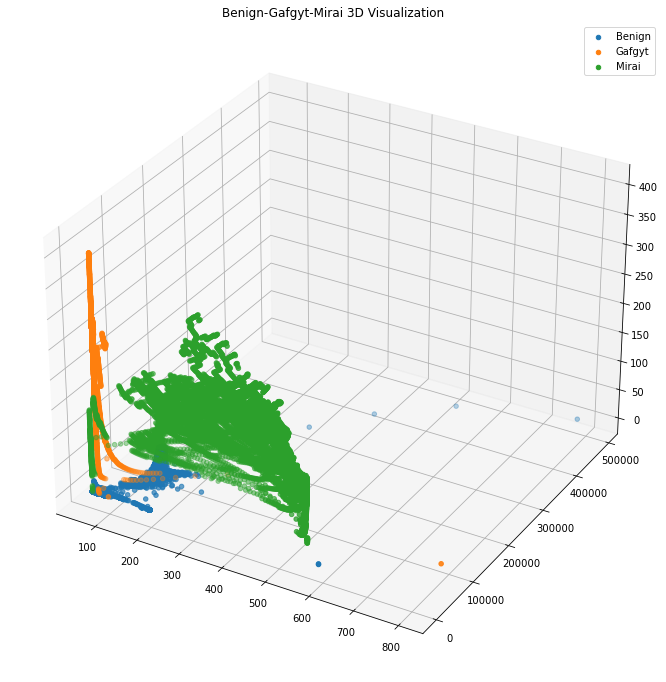

In [19]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,2,3])

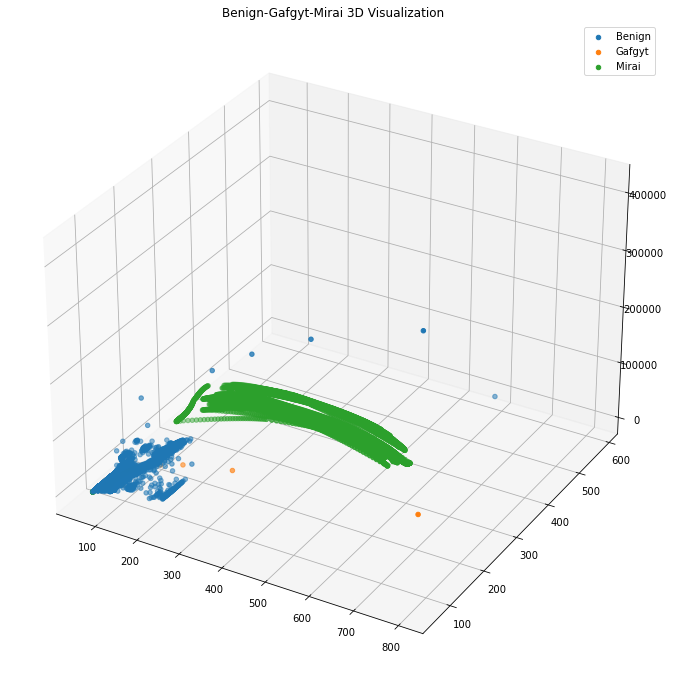

In [20]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_mirai[:10000], indexes=[1,10,20])

## Standardization

In [21]:
# Normalize


In [22]:
scaller, data_benign_standardized, _ = scale_data(X_train=data_benign)

In [23]:
data_gafgyt_standardized = scaller.transform(data_gafgyt)

In [24]:
data_mirai_standardized = scaller.transform(data_mirai)

### Statistics

In [25]:
data_benign.min(), data_benign_standardized.min(), data_benign.max(), data_benign_standardized.max()

(-59767.502, -1.0, 5.88e+17, 1.0)

In [26]:
data_benign.mean(), data_benign_standardized.mean()

(43716674712470.125, 0.09762419077932603)

In [27]:
data_gafgyt.min(), data_gafgyt_standardized.min(), data_gafgyt.max(), data_gafgyt_standardized.max()

(-84674.50914359995,
 -1.84425743034586,
 5.669444865125148e+17,
 177.46296495564627)

In [28]:
data_gafgyt.mean(), data_gafgyt_standardized.mean()

(572779872191078.4, 1.488161230404879)

In [29]:
data_mirai.min(), data_mirai_standardized.min(), data_mirai.max(), data_mirai_standardized.max()

(0.0, 0.0, 5.682574521729942e+17, 143.28507210910595)

In [30]:
data_mirai.mean(), data_mirai_standardized.mean()

(3947903438155.8994, 2.7133507093579214)

In [31]:
np.median(data_gafgyt_standardized), np.median(data_mirai_standardized)

(0.004266537664771578, 0.03418297874283529)

In [32]:
np.median(data_benign_standardized)

0.02648908590009162

In [33]:
data_gafgyt_standardized.std(), data_mirai_standardized.std()

(10.358632398083955, 13.449750399215354)

In [34]:
data_benign_standardized.std()

0.1822724097052613

In [35]:
np.median(data_benign), np.median(data_gafgyt), np.median(data_mirai)

(14.05010134, 1.0, 17.953937254322227)

In [36]:
data_benign.std(), data_gafgyt.std(), data_mirai.std()

(3797092471676006.5, 1.65608992334071e+16, 959638632007416.0)

### Visualization

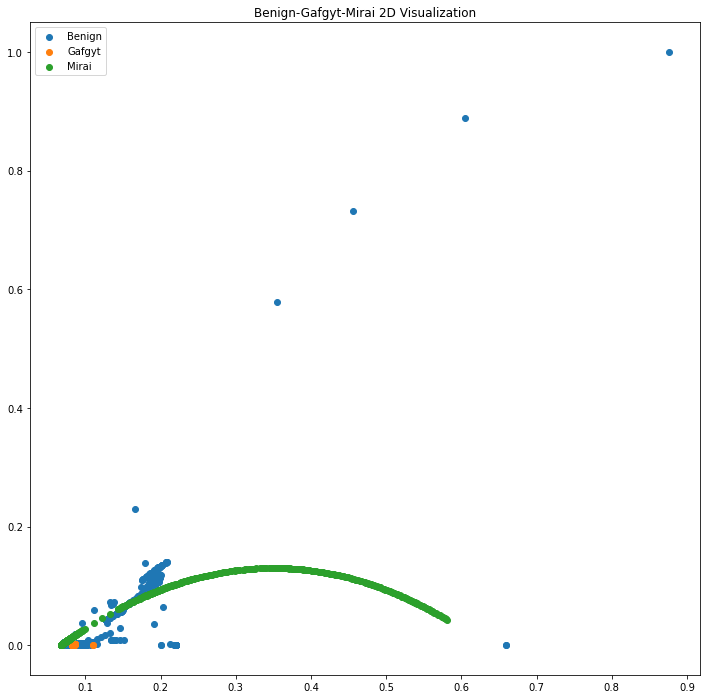

In [37]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[1,2])

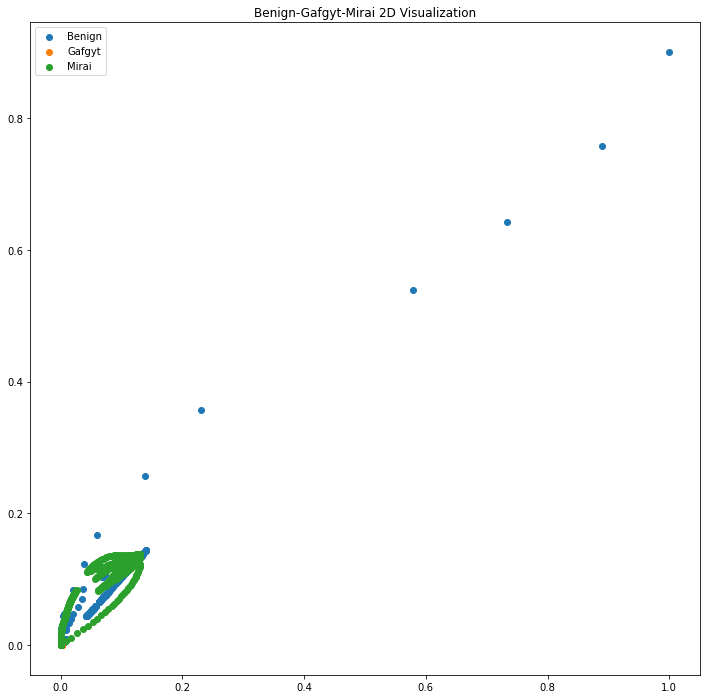

In [38]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[2,5])

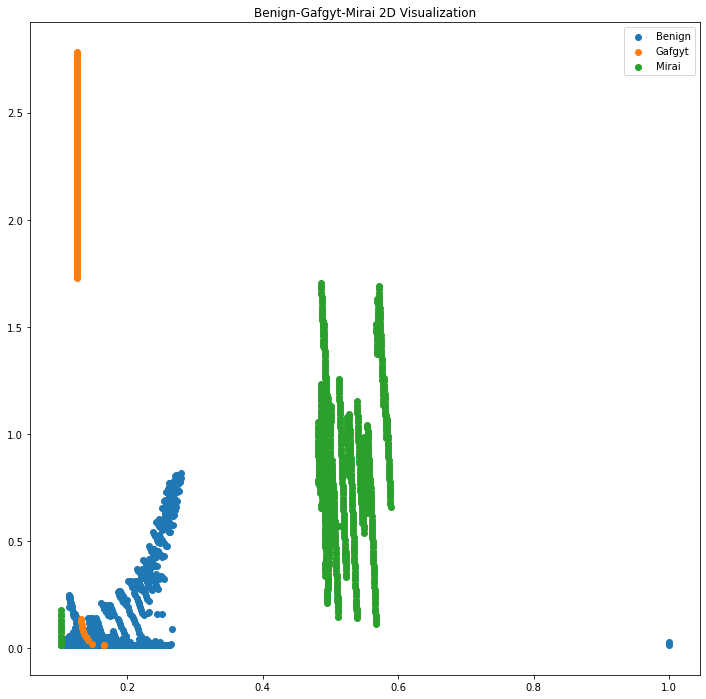

In [39]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_mirai_standardized[:1000], indexes=[10,15])

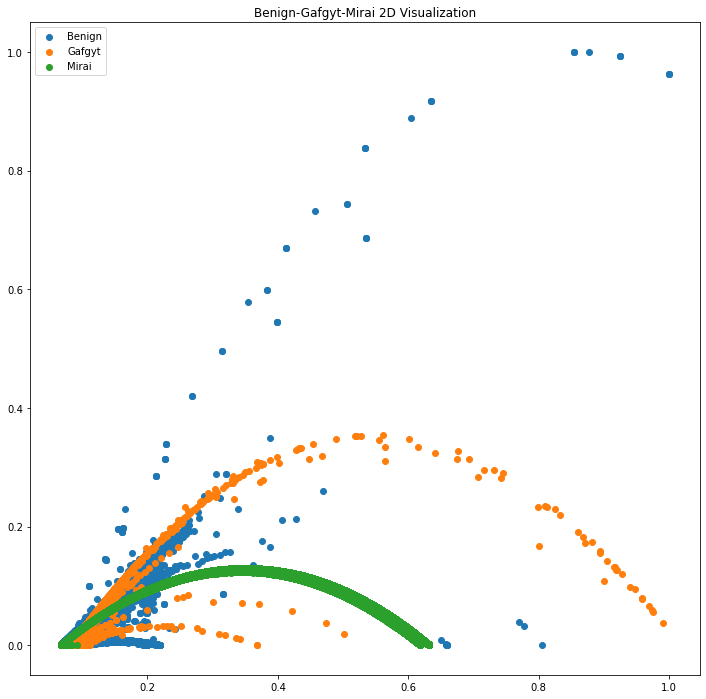

In [40]:
visualization_2d(data_benign_standardized, data_gafgyt_standardized, data_mirai_standardized, indexes=[1,2])

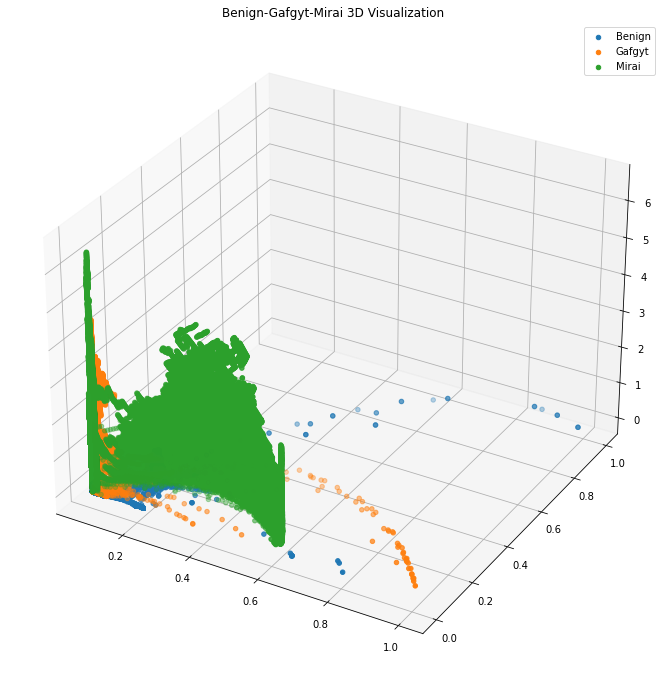

In [41]:
visualization_3d(data_benign_standardized, data_gafgyt_standardized, data_mirai_standardized, indexes=[1,2,3])

# Train AE

### Train on Benign

--------------Training and testing in the same device----------------
(98514, 115) (98514,)
------------Scale data-----------------
(98514, 115) (98514,)
X_train_scaled
[[1.48675736e-02 6.70139141e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.48675736e-02 6.58970155e-01 0.00000000e+00 ... 3.54619013e-02
  0.00000000e+00 0.00000000e+00]
 [2.90954355e-02 6.58970155e-01 1.18339396e-16 ... 3.66629230e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.48689165e-02 8.71185780e-02 2.83702741e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.25581538e-02 8.71182552e-02 9.67214930e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.44776346e-02 8.71181832e-02 5.50130167e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `ae` is used for feacture extraction (it can be `ae` or `pca`)-----------
-------------AE process-------------
Epoch 1/50
395/395 [==============================] - 5s 12ms/step - loss: 0.0038 - val_loss: 8.2125e-04

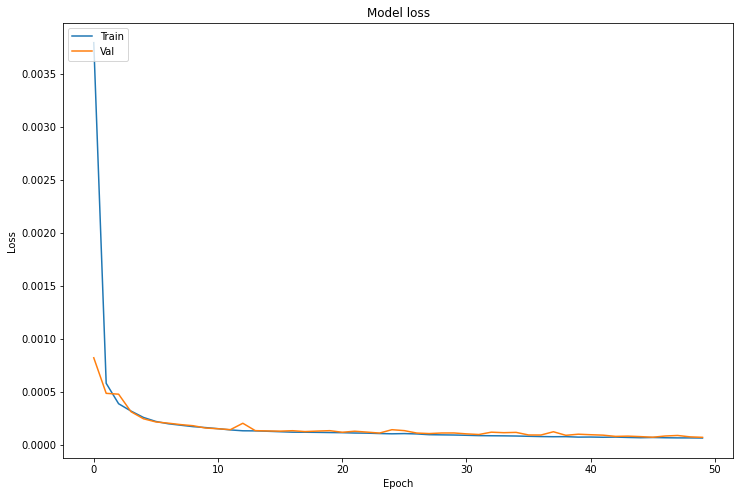

(98514, 29) (98514,)
---------Normalize data--------------
(98514, 29) (98514,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM-------------------------------------
Number of feature:  29
Hyper-parameters optimization process
Best: {'learning_rate': 2.760156384952695, 'sigma': 7.934348899792336, 'x': 38.641402683175684}
---------SOM has been turned!-----------
Starting SOM Weights init
Perform SOM (turned) train random
1.0
Total train time: 452.8369777202606


In [42]:
_, _, _, _, encoder, _ = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='ae', num_features=29)

In [43]:
# Transform data
data_benign_encoded = encoder.predict(data_benign_standardized)
data_gafgyt_encoded = encoder.predict(data_gafgyt_standardized)
data_mirai_encoded = encoder.predict(data_mirai_standardized)

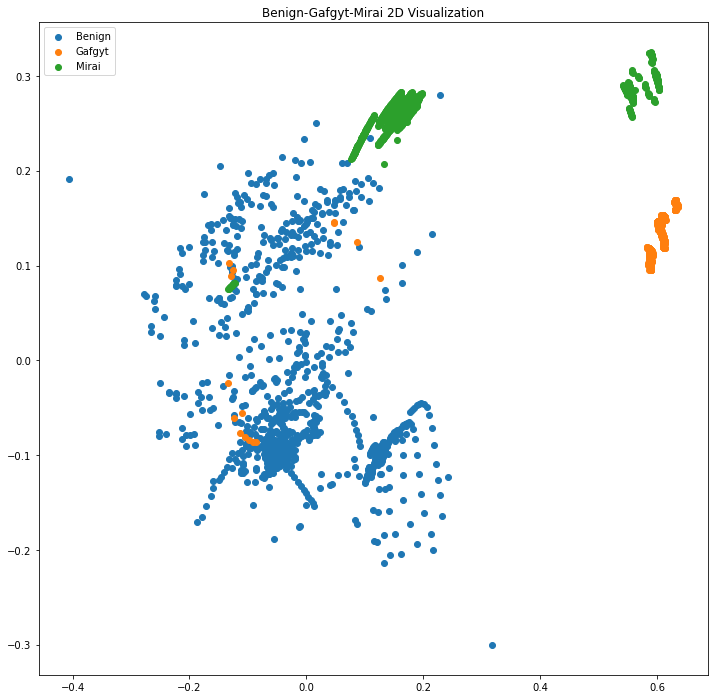

In [44]:
visualization_2d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[0,1])

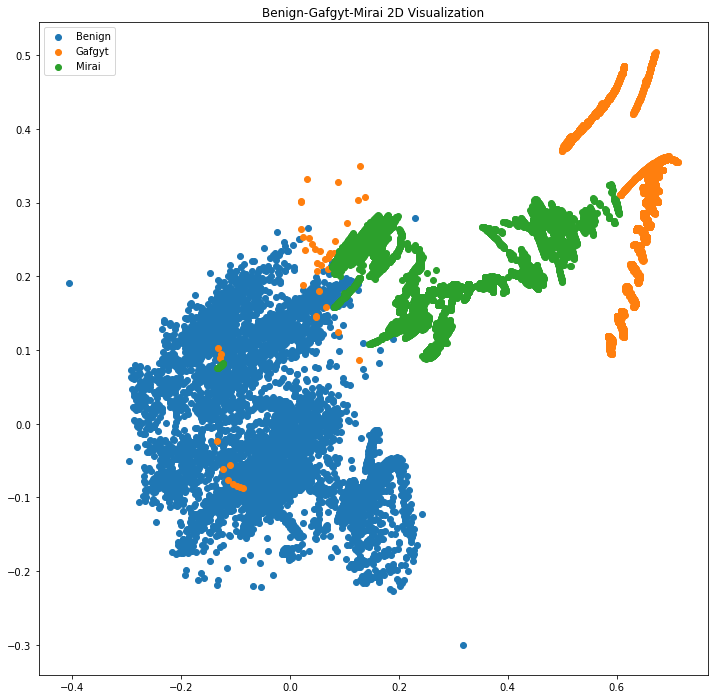

In [45]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[0,1])

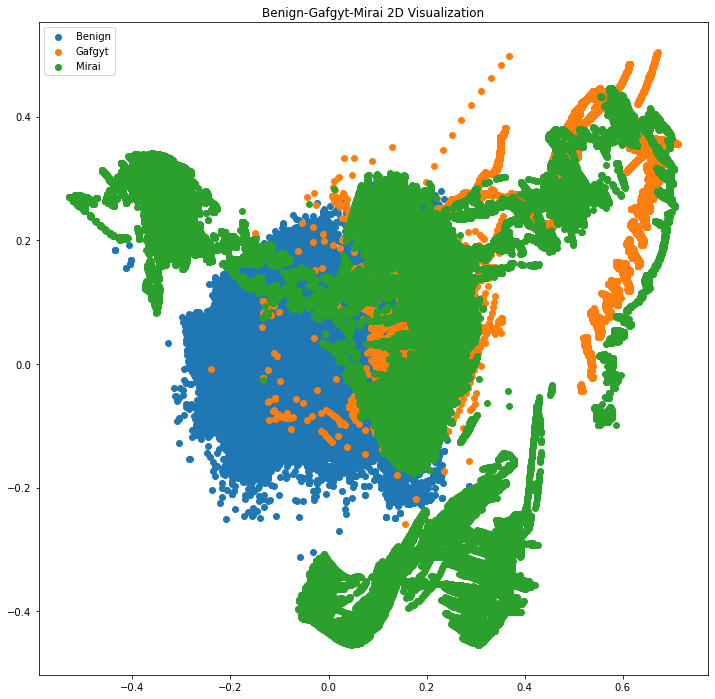

In [46]:
visualization_2d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[0,1])

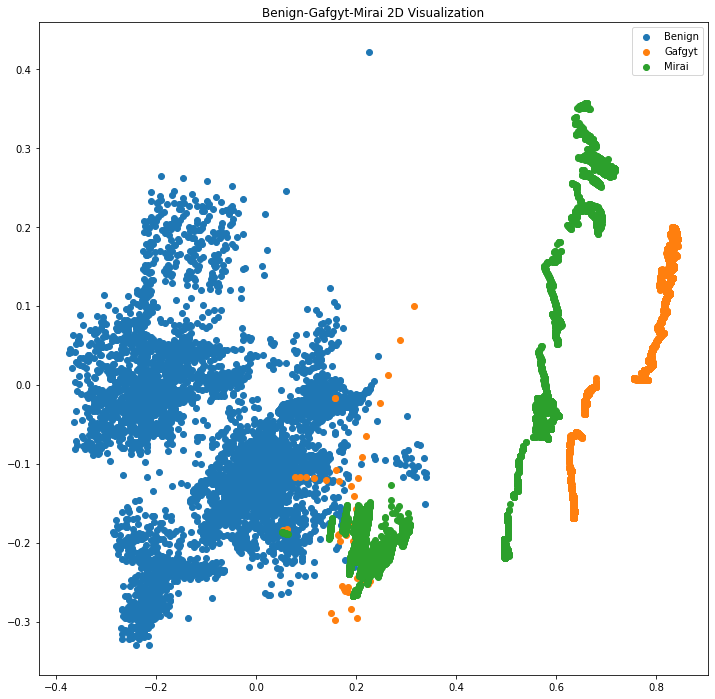

In [47]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000],data_mirai_encoded[:10000], indexes=[10,25])

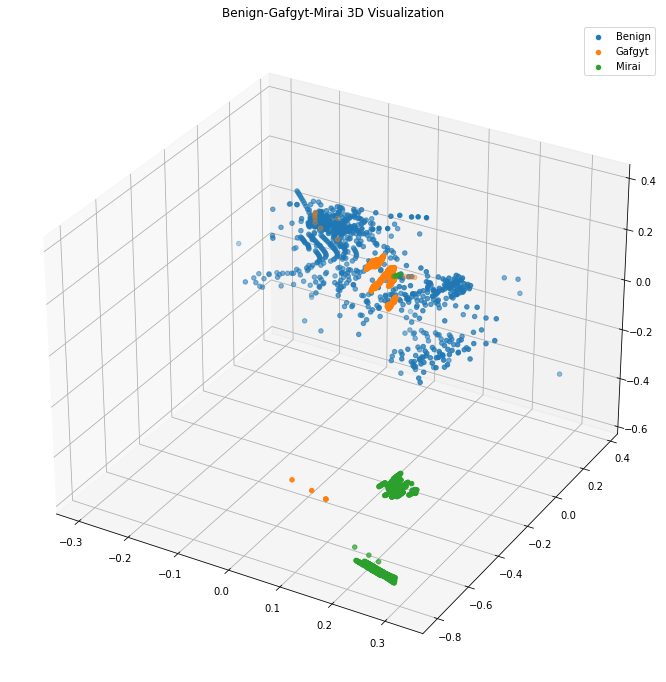

In [48]:
visualization_3d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000],data_mirai_encoded[:1000], indexes=[1,2,3])

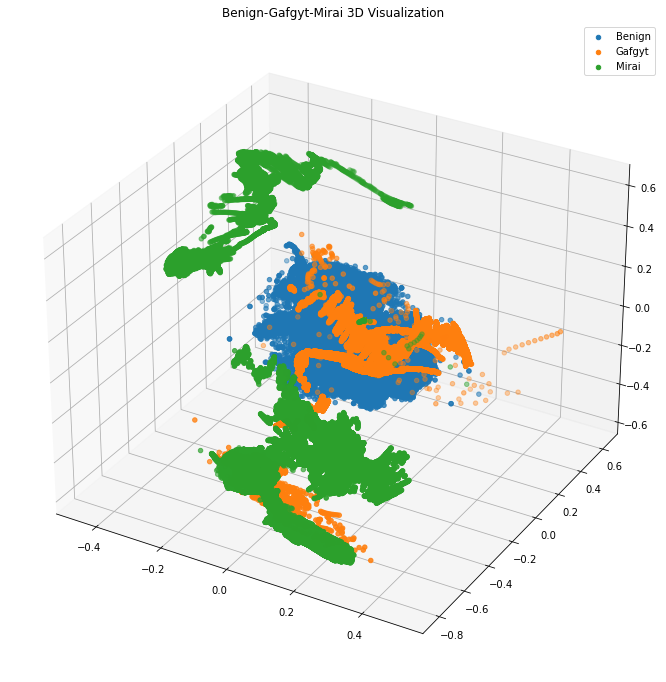

In [49]:
visualization_3d(data_benign_encoded, data_gafgyt_encoded,data_mirai_encoded, indexes=[1,2,3])

In [50]:
_, _, _, _, _, pca = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='pca', num_features=29)

--------------Training and testing in the same device----------------
(98514, 115) (98514,)
------------Scale data-----------------
(98514, 115) (98514,)
X_train_scaled
[[1.48675736e-02 6.70139141e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.48675736e-02 6.58970155e-01 0.00000000e+00 ... 3.54619013e-02
  0.00000000e+00 0.00000000e+00]
 [2.90954355e-02 6.58970155e-01 1.18339396e-16 ... 3.66629230e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.48689165e-02 8.71185780e-02 2.83702741e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.25581538e-02 8.71182552e-02 9.67214930e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.44776346e-02 8.71181832e-02 5.50130167e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `pca` is used for feacture extraction (it can be `ae` or `pca`)-----------
PCA process
(98514, 29) (98514,)
---------Normalize data--------------
(98514, 29) (98514,)
--------------------Train SOM on normalized data

In [51]:
data_benign_transformed = pca.transform(data_benign_standardized)
data_gafgyt_transformed = pca.transform(data_gafgyt_standardized)
data_mirai_transformed = pca.transform(data_mirai_standardized)

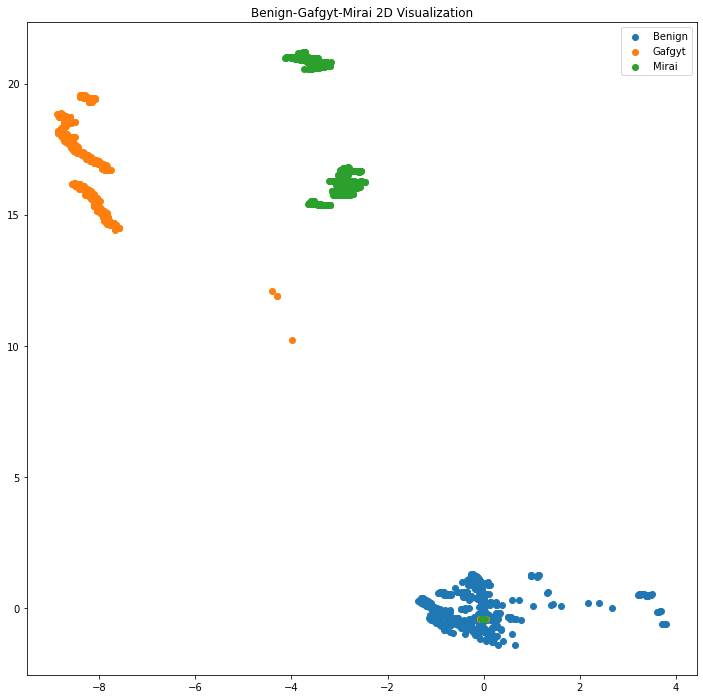

In [52]:
visualization_2d(data_benign_transformed[:1000], data_gafgyt_transformed[:1000],data_mirai_transformed[:1000], indexes=[1,2])

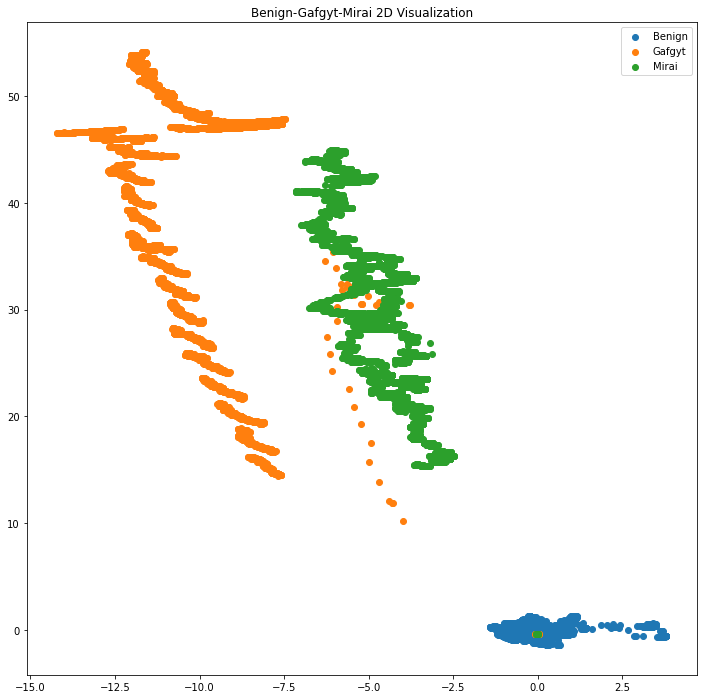

In [53]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2])

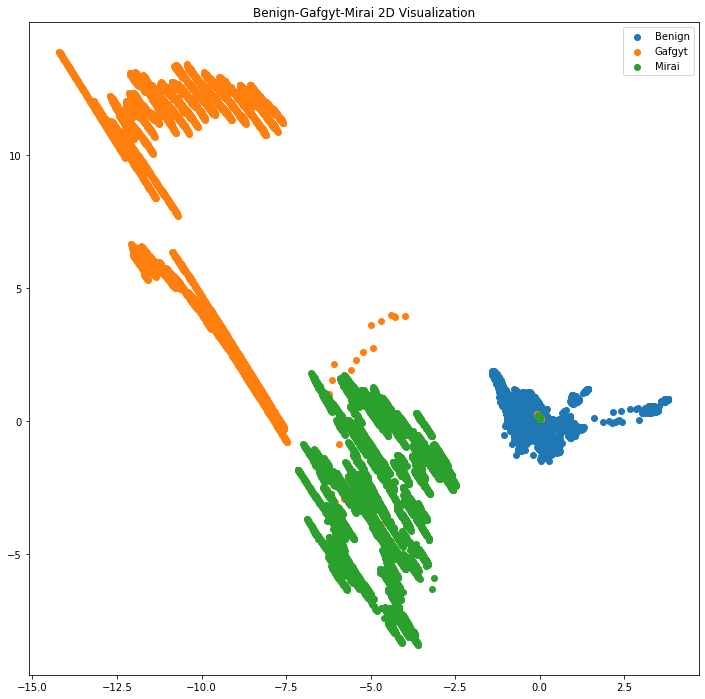

In [54]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,3])

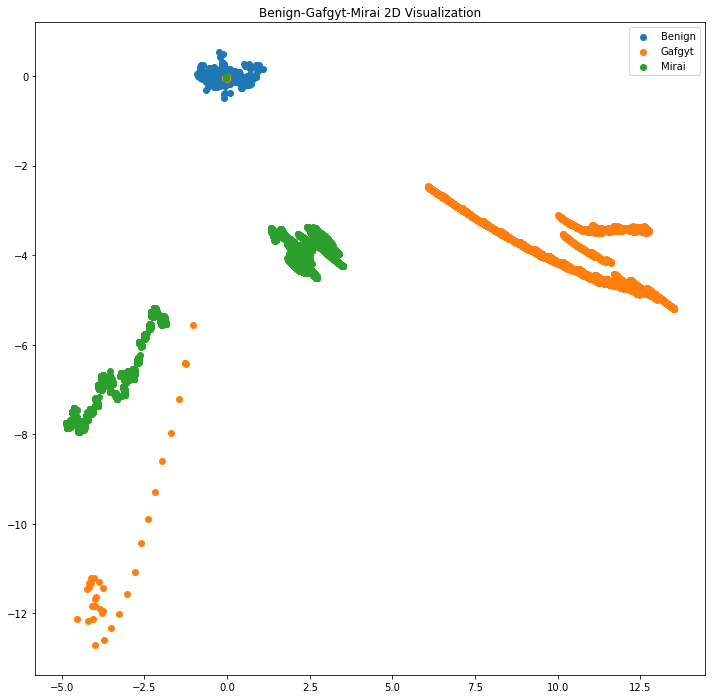

In [55]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[10,25])

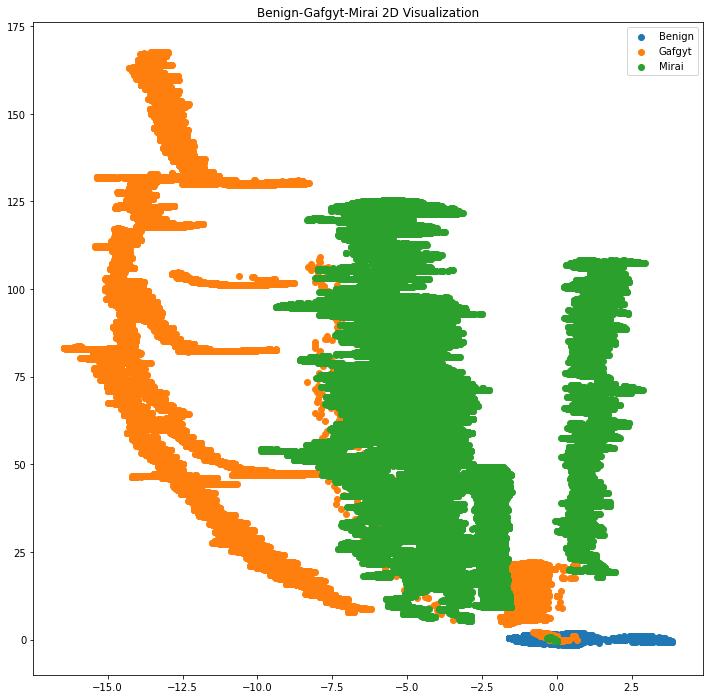

In [56]:
visualization_2d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2])

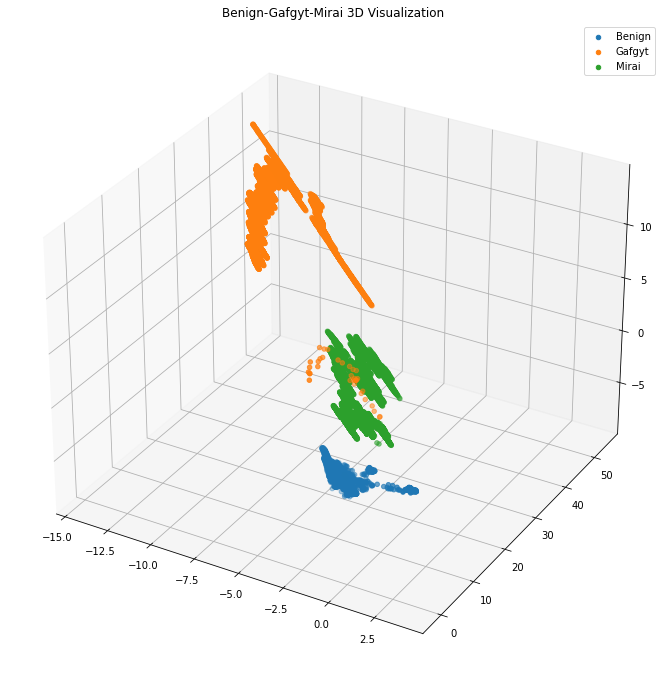

In [57]:
visualization_3d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000],data_mirai_transformed[:10000], indexes=[1,2,3])

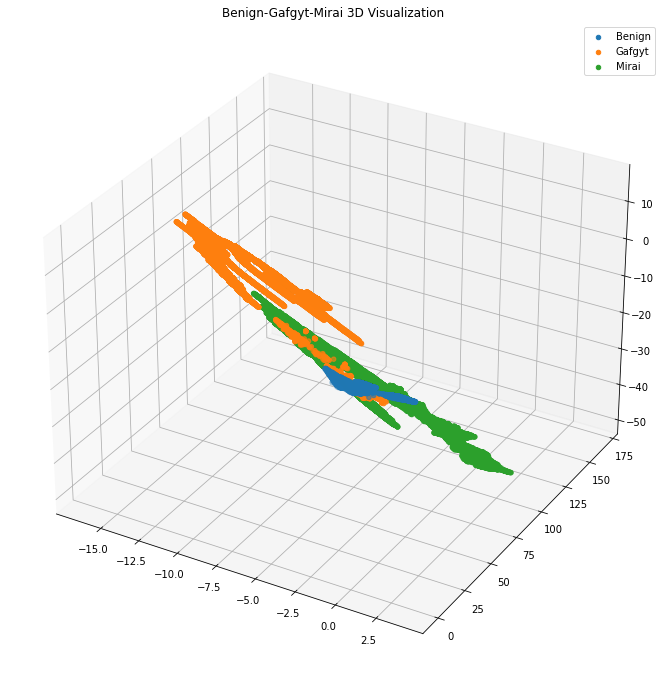

In [58]:
visualization_3d(data_benign_transformed, data_gafgyt_transformed,data_mirai_transformed, indexes=[1,2,3])